In [335]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [336]:
pd.set_option('display.max_row',111) 
pd.set_option('display.max_column',111) 
#pour afficher toutes les colonnes
data = pd.read_excel('data.xlsx')
data.head()

#Target  :  SARS-Cov-2
#Lignes  et colonnes :  5644x111

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [337]:
df = data.copy()

In [338]:
df.shape

(5644, 111)

In [339]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [340]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
5          False                 False                   False   
6          False                 False                   False   
7          False                 False                   False   
8          False                 False                   False   
9          False                 False                   False   
10         False                 False                   False   
11         False                 False                   False   
12         False                 False                   False   
13         False                 False                   False   
14         False                 False                   False   
15         False                 False                   False   
16         False                 False                   False   
17         False                 False                   False   
18         False                 False                   False   
19         False                 False                   False   
20         False                 False                   False   
21         False                 False                   False   
22         False                 False                   False   
23         False                 False                   False   
24         False                 False                   False   
25         False                 False                   False   
26         False                 False                   False   
27         False                 False                   False   
28         False                 False                   False   
29         False                 False                   False   
30         False                 False                   False   
31         False                 False                   False   
32         False                 False                   False   
33         False                 False                   False   
34         False                 False                   False   
35         False                 False                   False   
36         False                 False                   False   
37         False                 False                   False   
38         False                 False                   False   
39         False                 False                   False   
40         False                 False                   False   
41         False                 False                   False   
42         False                 False                   False   
43         False                 False                   False   
44         False                 False                   False   
45         False                 False                   False   
46         False                 False                   False   
47         False                 False                   False   
48         False                 False                   False   
49         False                 False                   False   
50         False                 False                   False   
51         False                 False                   False   
52         False                 False                   False   
53         False                 False                   False   
54         False                 False                   False   
...          ...                   ...                     ...   
5589       False                 False                   False   
5590       False                 False                   False   
5591       False                 False                   False   
5592       False                 False        

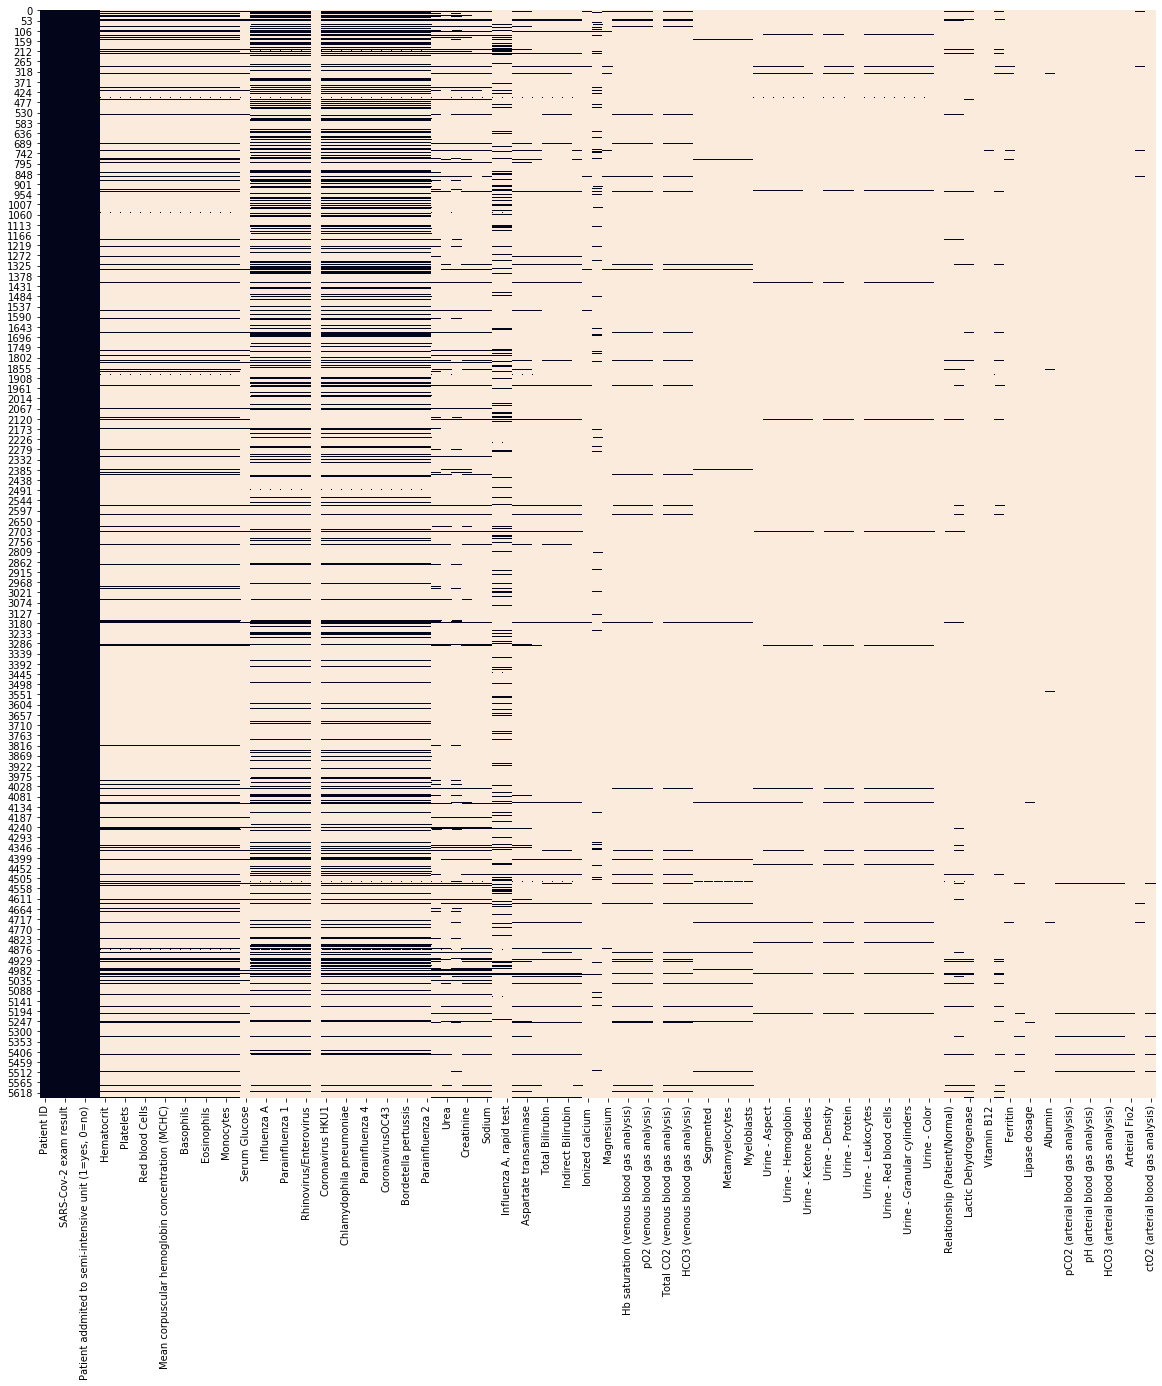

In [341]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(),cbar=False)

# Eliminations des valeurs inutiles

In [342]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [343]:
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

In [344]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

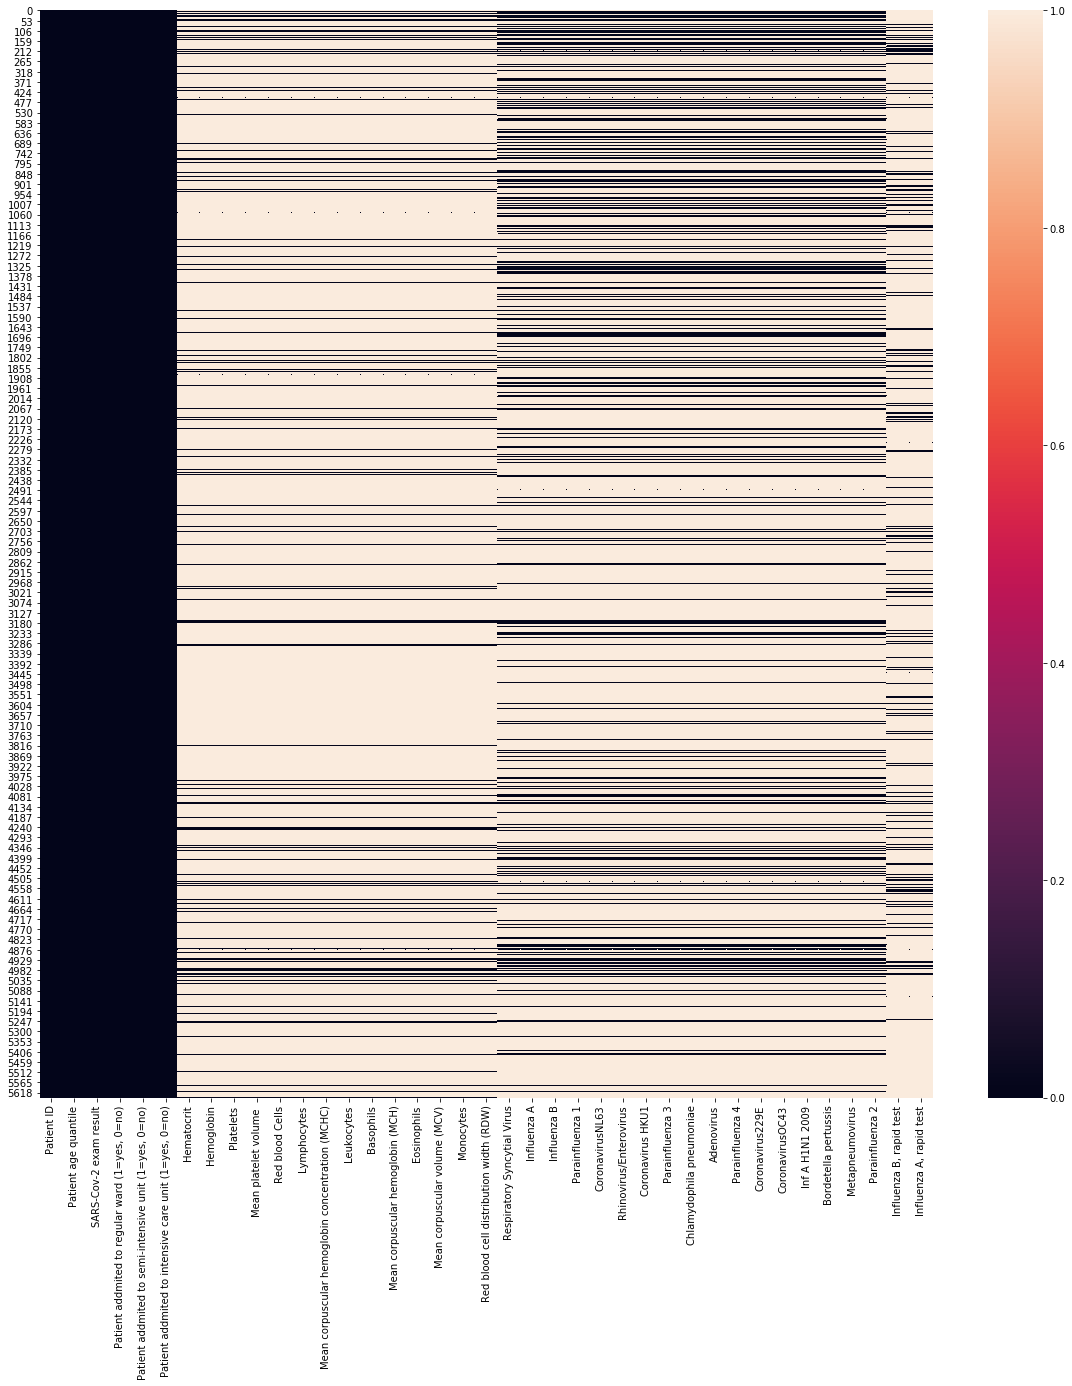

In [345]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna())

In [346]:
df = df.drop('Patient ID', axis=1)

In [347]:
df['SARS-Cov-2 exam result'].value_counts()
#value_counts(normalize=True) pour afficher les pourcentages

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

# Histogramme valeur continue

C:\Users\malic\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malic\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


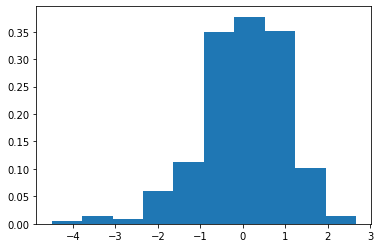

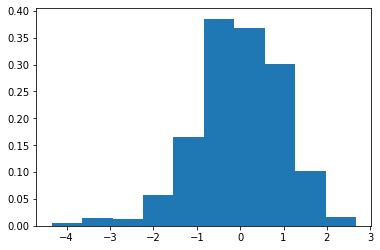

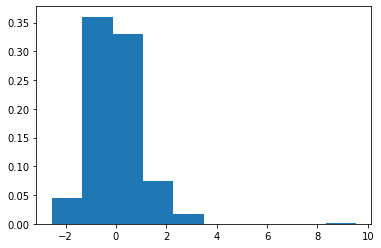

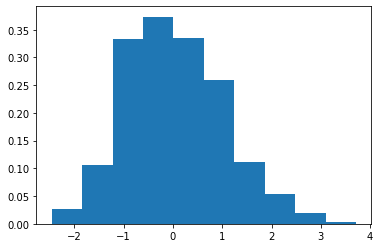

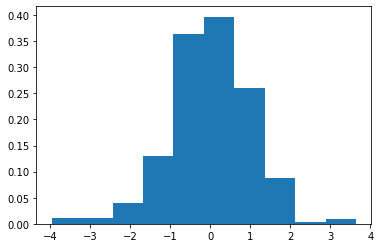

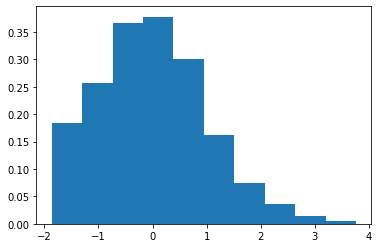

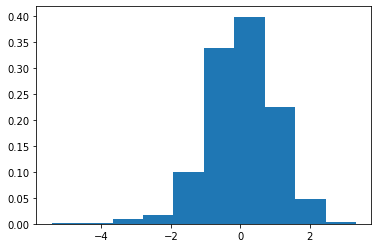

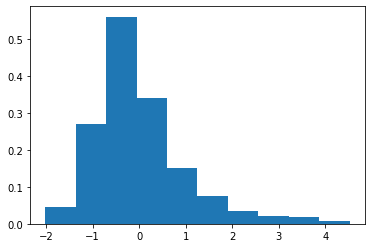

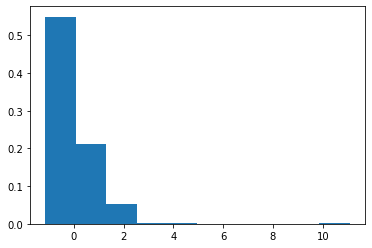

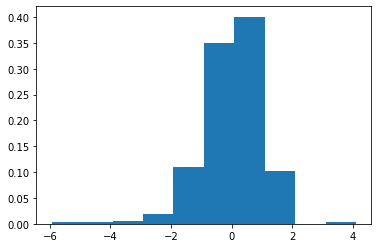

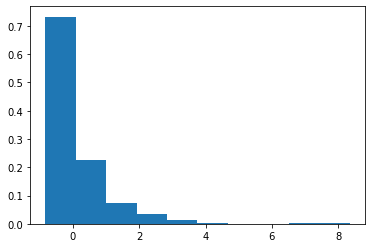

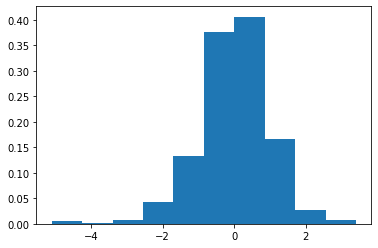

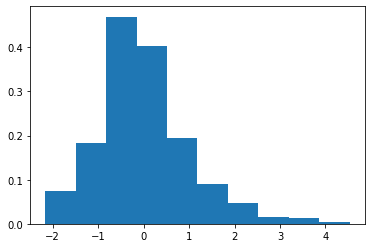

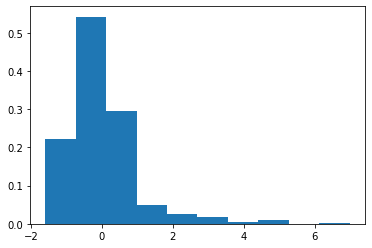

In [348]:
for col in df.select_dtypes('float'):
    plt.figure()
    plt.hist(df[col], density=True)
    #sns.distplot(df[col])

# Variable Qualitative

In [349]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [350]:
for col in df.select_dtypes('object'):
    print(f'{col : <50} {df[col].unique()}')

SARS-Cov-2 exam result                             ['negative' 'positive']
Respiratory Syncytial Virus                        [nan 'not_detected' 'detected']
Influenza A                                        [nan 'not_detected' 'detected']
Influenza B                                        [nan 'not_detected' 'detected']
Parainfluenza 1                                    [nan 'not_detected' 'detected']
CoronavirusNL63                                    [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                             [nan 'detected' 'not_detected']
Coronavirus HKU1                                   [nan 'not_detected' 'detected']
Parainfluenza 3                                    [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                           [nan 'not_detected' 'detected']
Adenovirus                                         [nan 'not_detected' 'detected']
Parainfluenza 4                                    [nan 'not_detected' 'detected']
Coronavirus2

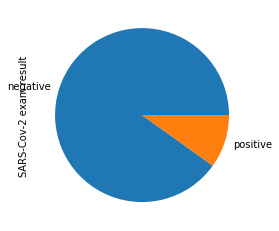

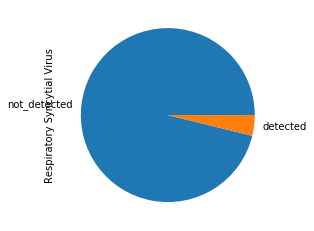

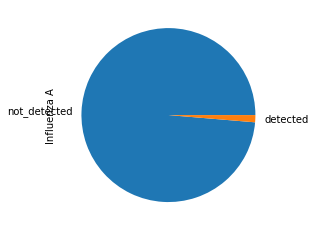

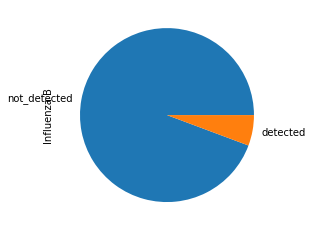

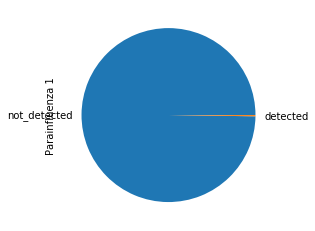

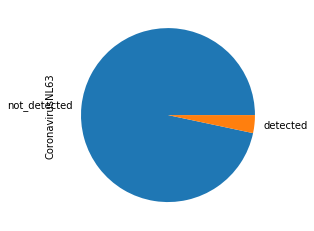

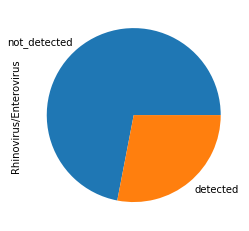

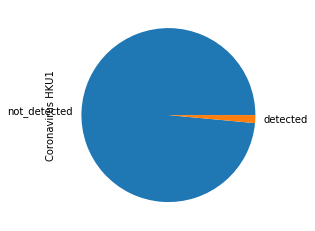

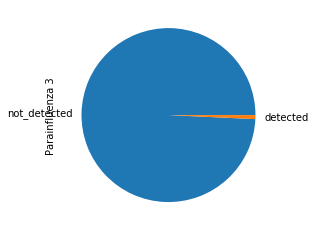

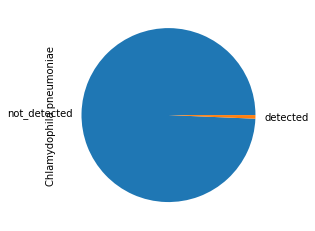

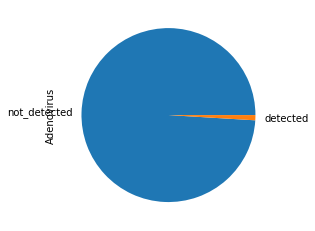

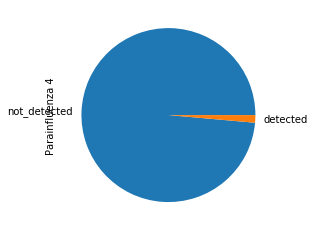

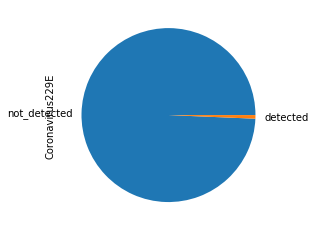

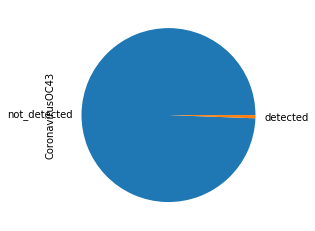

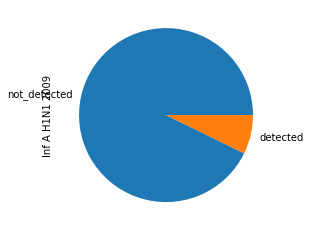

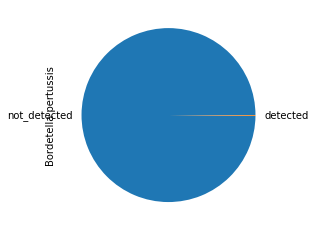

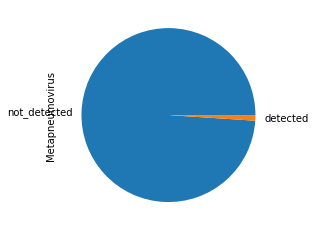

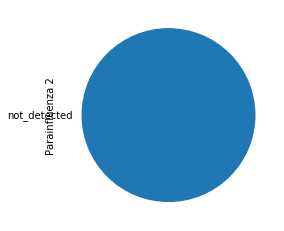

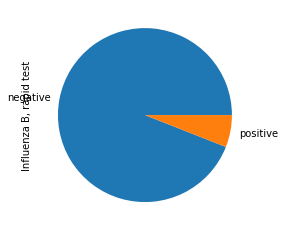

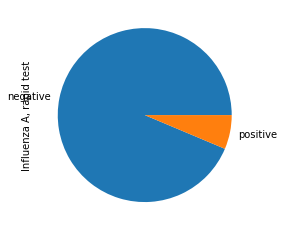

In [351]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation avec la target

In [352]:
df_positif = df[df['SARS-Cov-2 exam result'] == 'positive']

In [353]:
df_negatif =  df[df['SARS-Cov-2 exam result'] == 'negative']

In [354]:
missing = df.isna().sum()/df.shape[0]

In [355]:
blood = df.columns[(missing < 0.9) & (missing > 0.88 )]

viral = df.columns[(missing < 0.88) & (missing > 0.76 )]

In [356]:
viral

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [357]:
import seaborn as sns

# Target et blood

C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

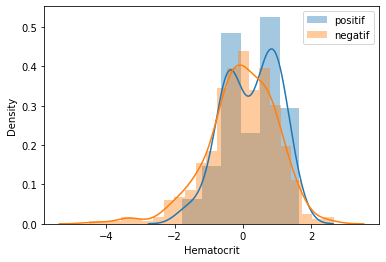

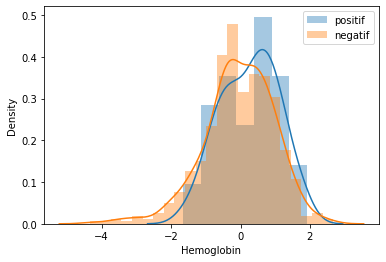

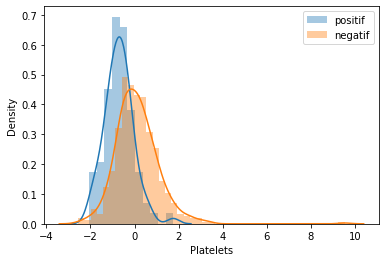

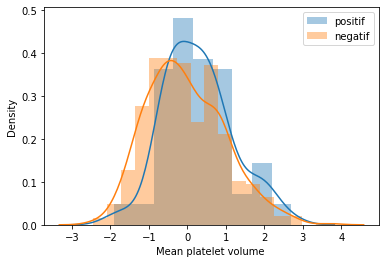

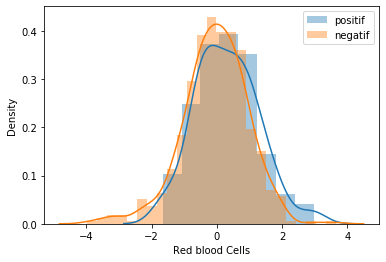

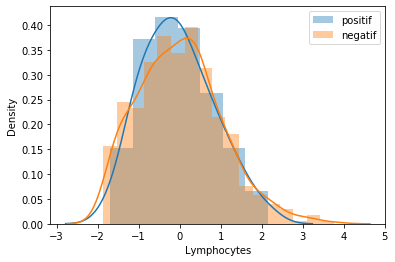

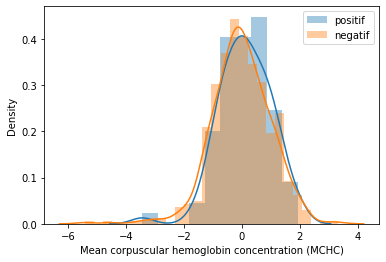

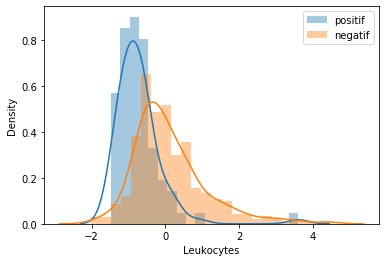

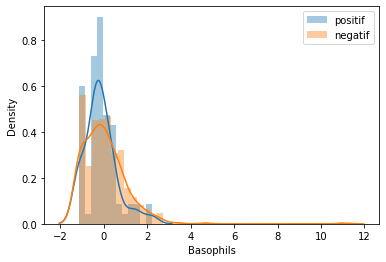

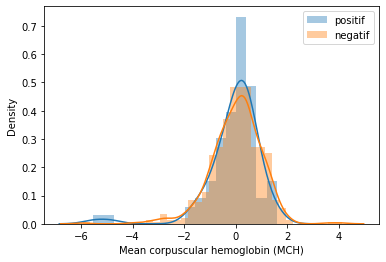

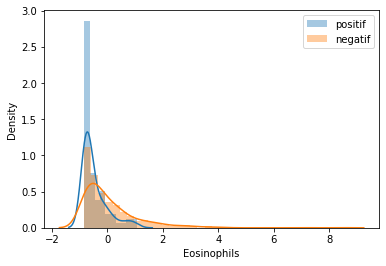

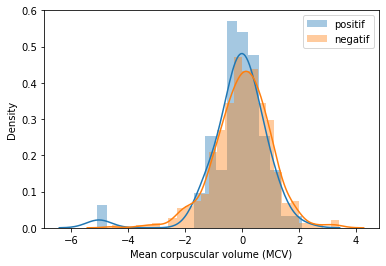

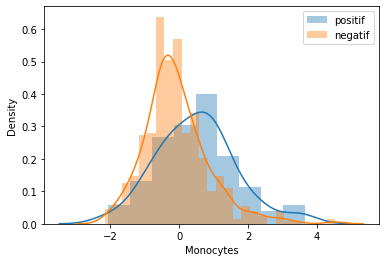

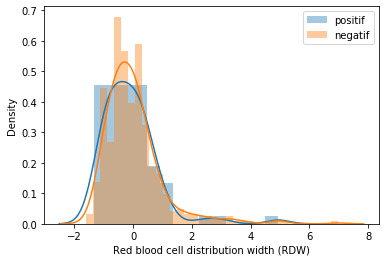

In [358]:
for col in blood:
    plt.figure()
    sns.distplot(df_positif[col], label = 'positif')
    sns.distplot(df_negatif[col], label = 'negatif')
    plt.legend()

# Relation Target/Age

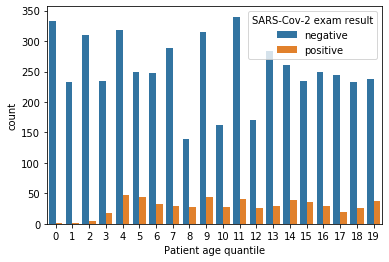

In [359]:
sns.countplot(x = 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data=df)

# Target/viral 

In [360]:
#crosstab compare deux variable qualitative

In [361]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

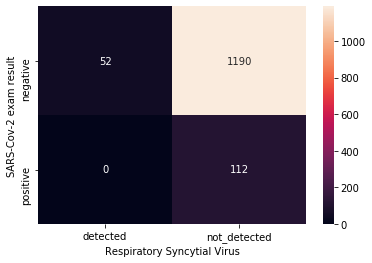

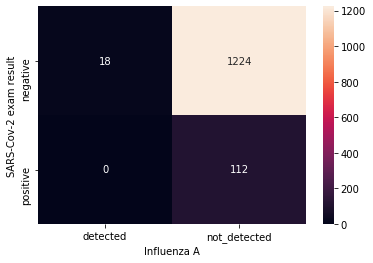

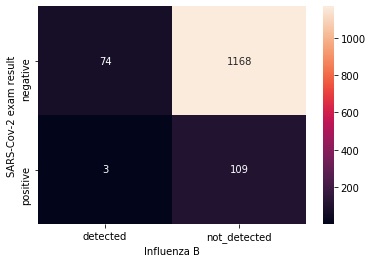

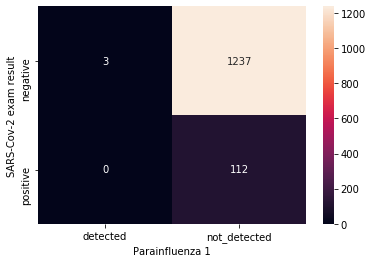

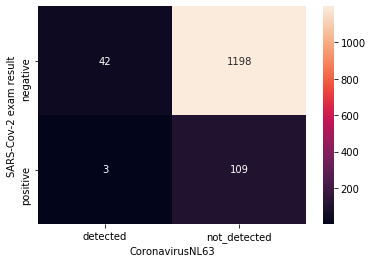

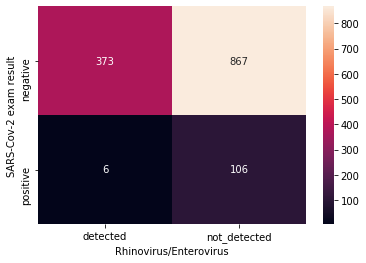

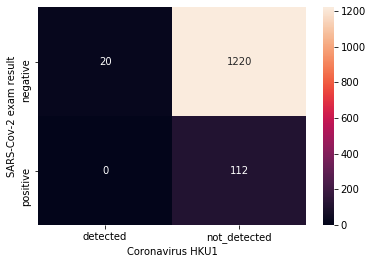

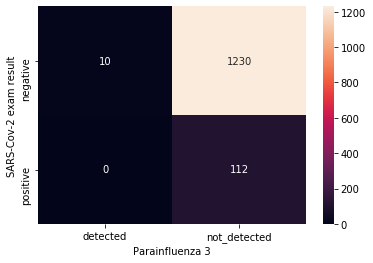

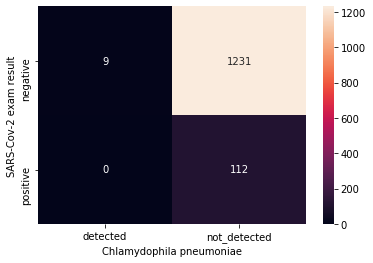

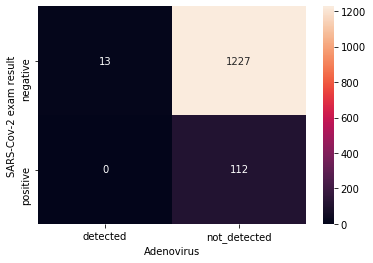

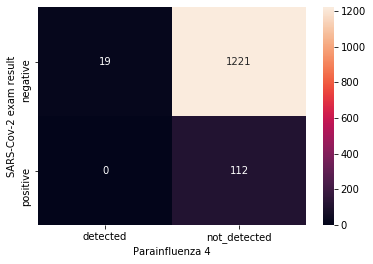

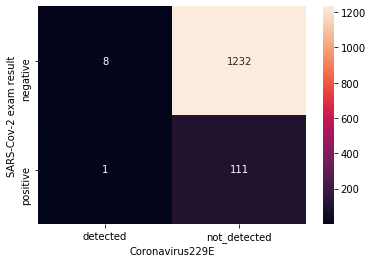

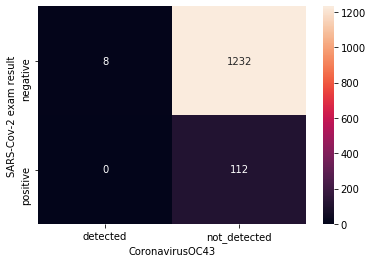

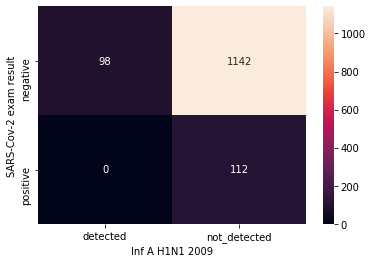

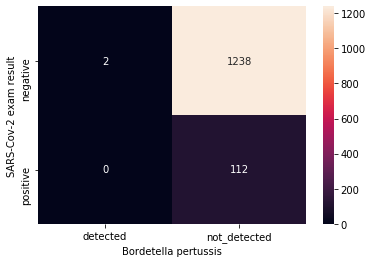

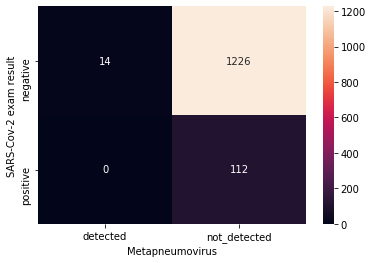

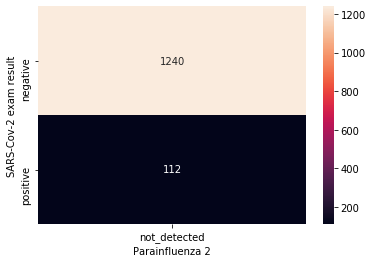

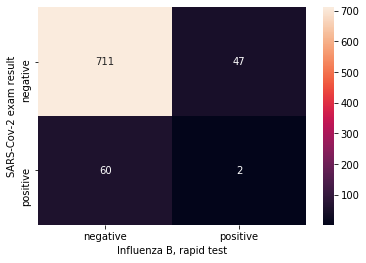

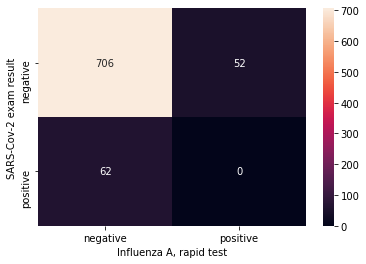

In [362]:
for col in viral: 
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

# Relation variables

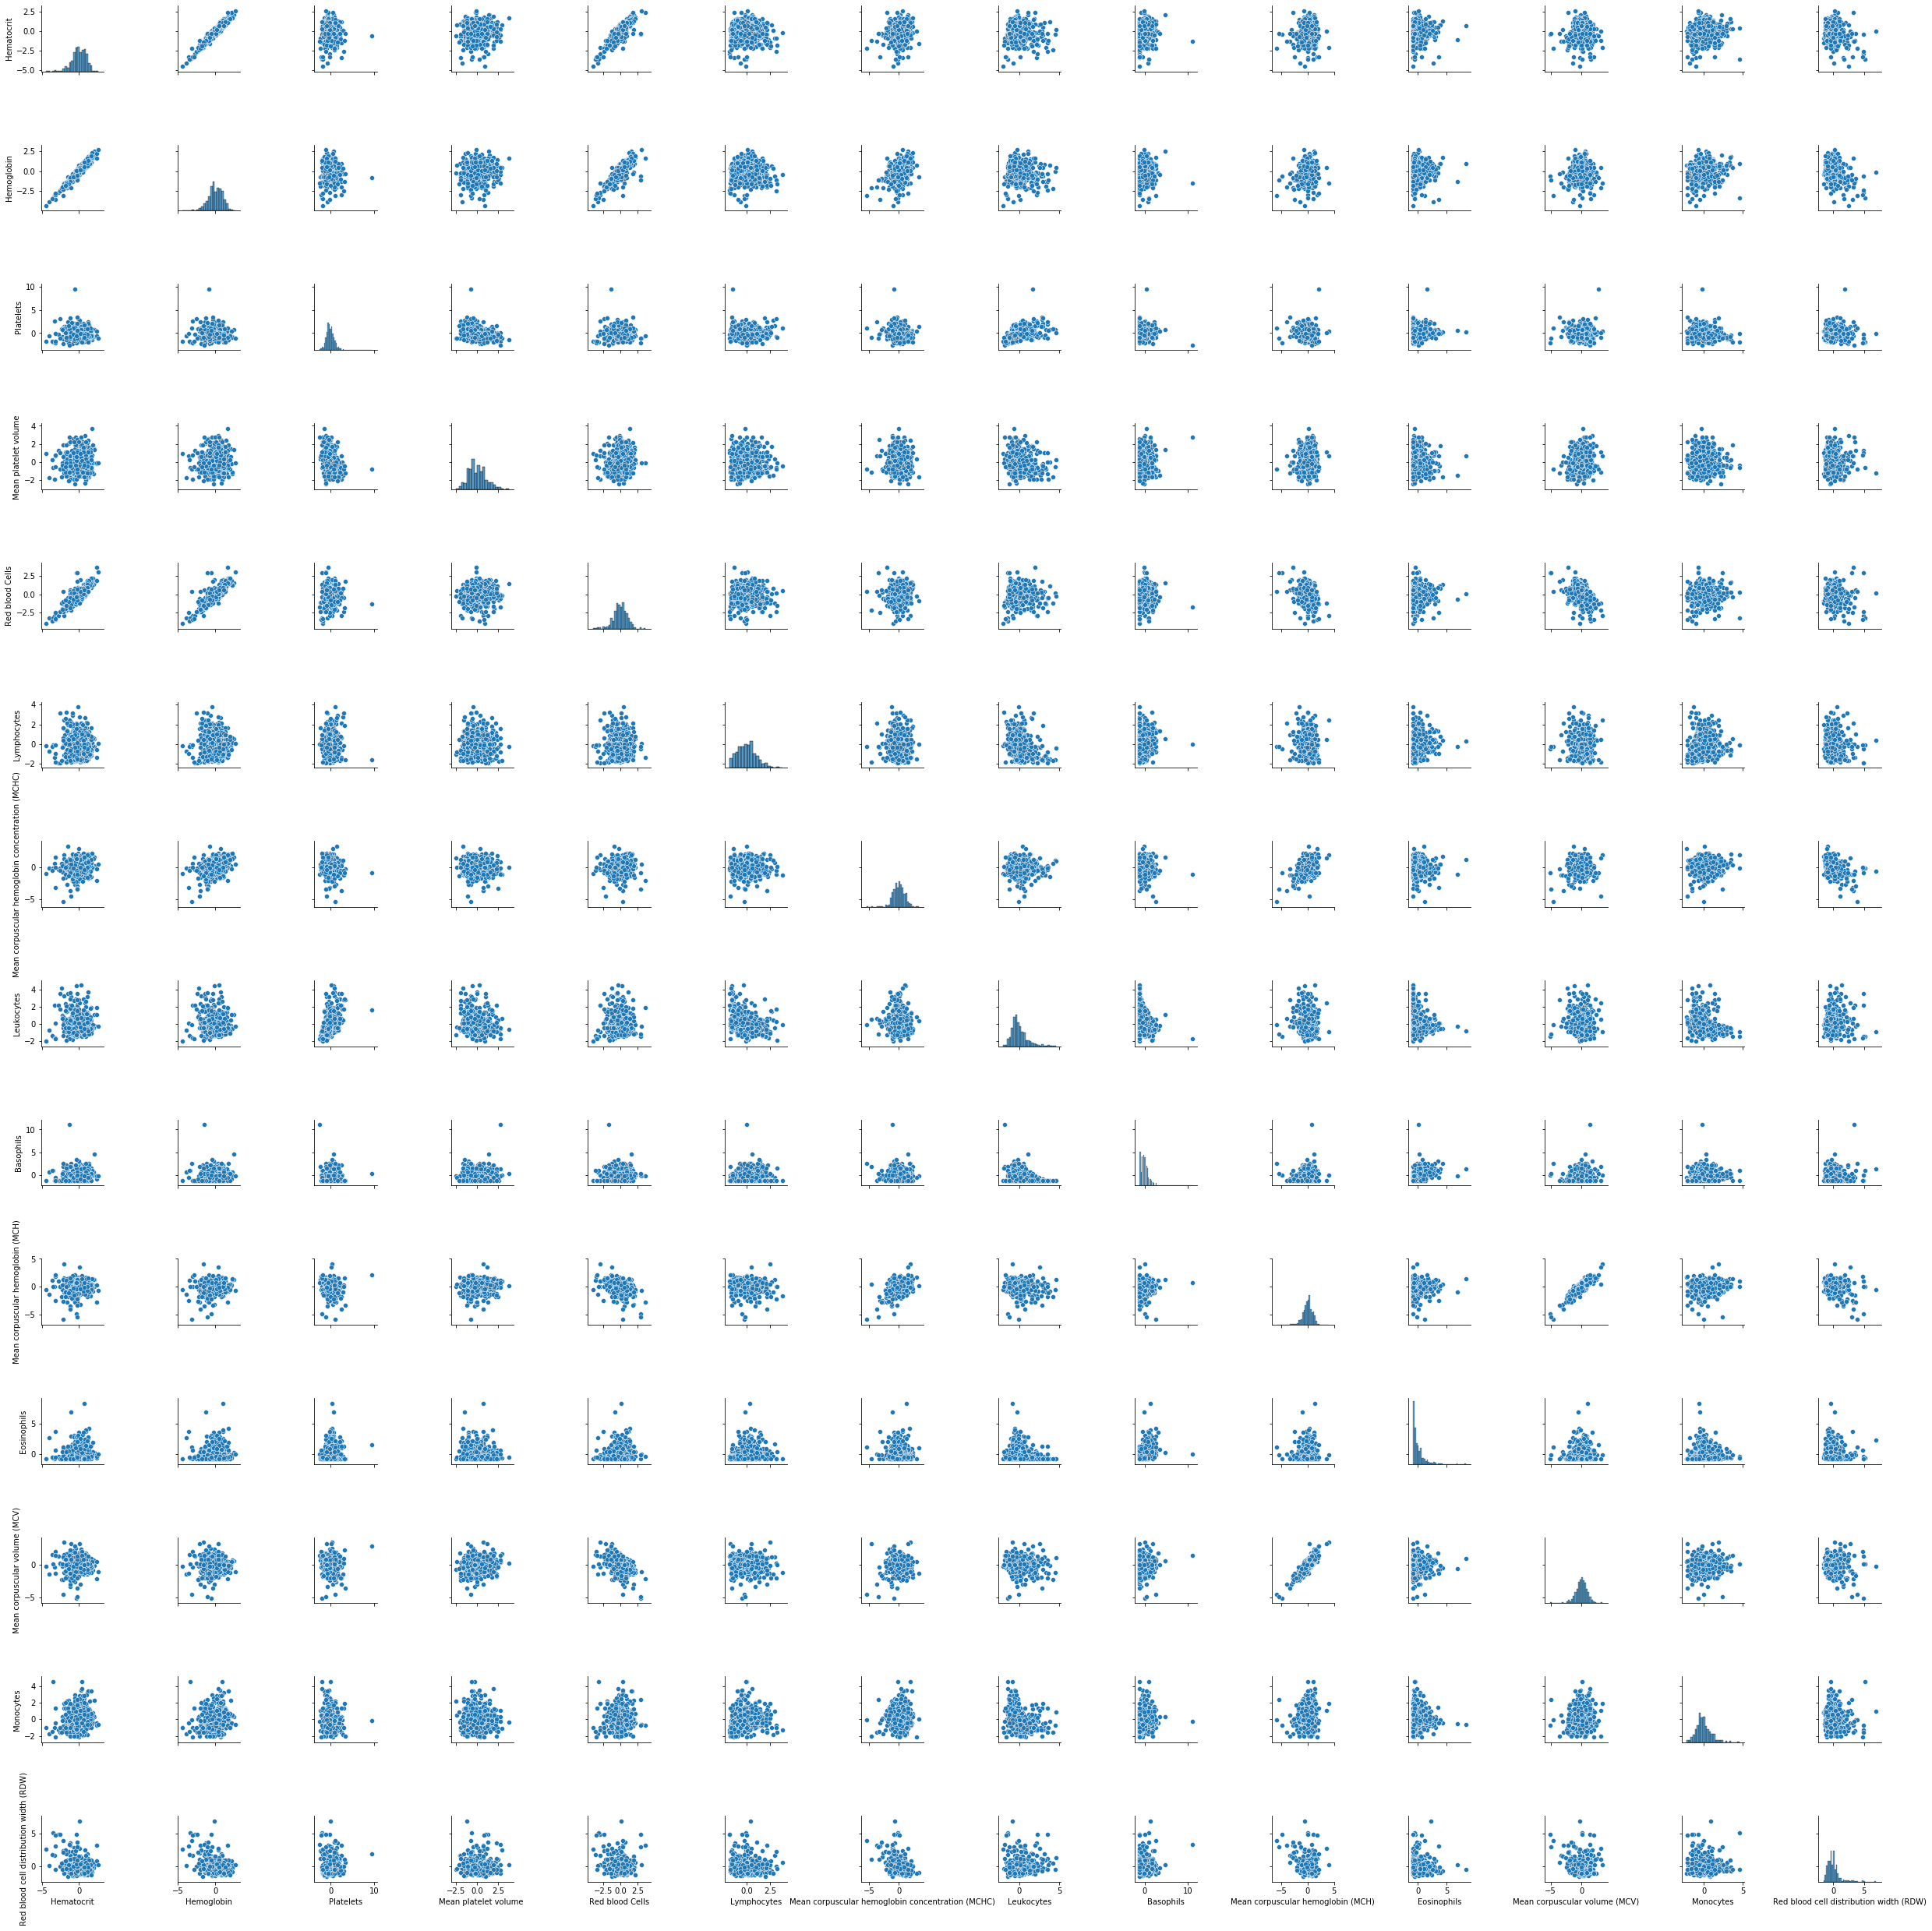

In [363]:
sns.pairplot(df[blood])

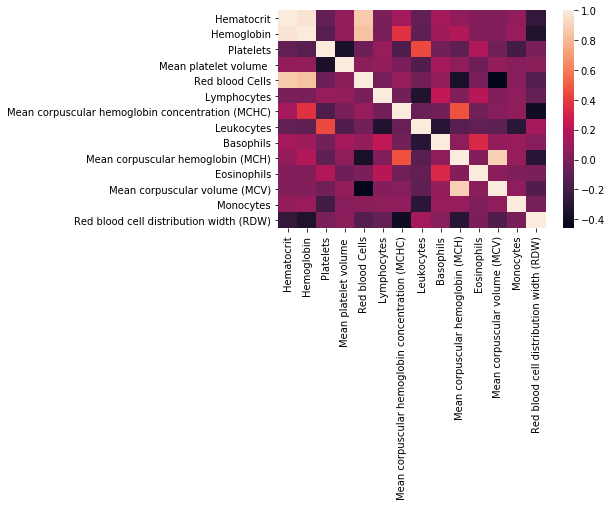

In [364]:
sns.heatmap(df[blood].corr())

# Patient/blood

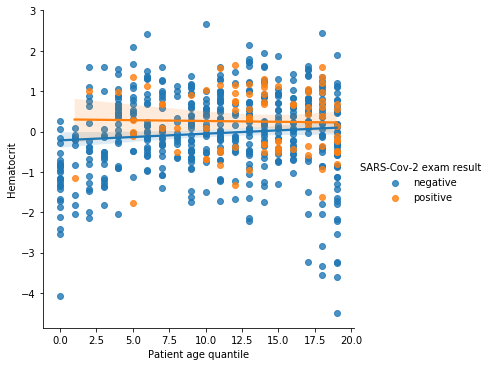

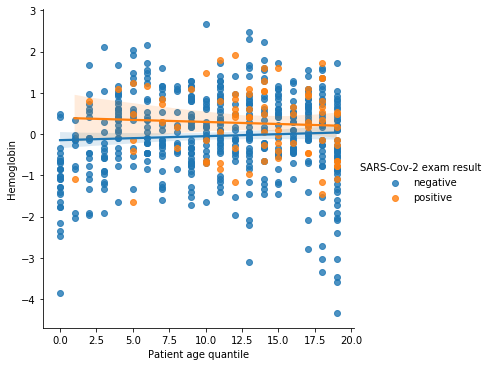

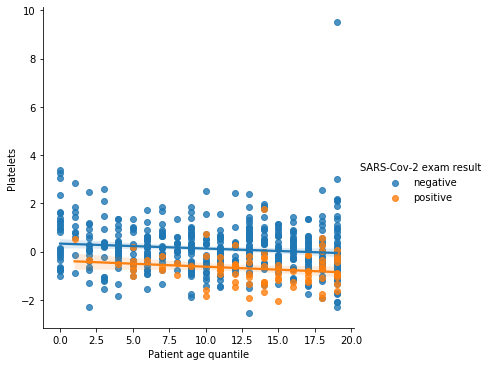

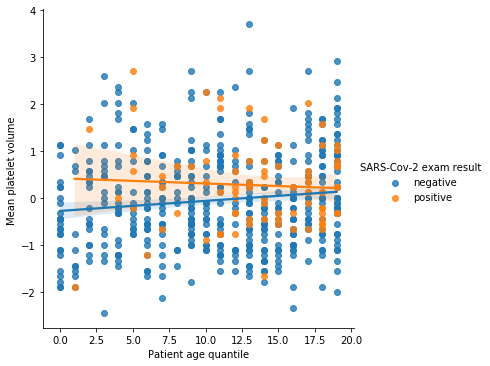

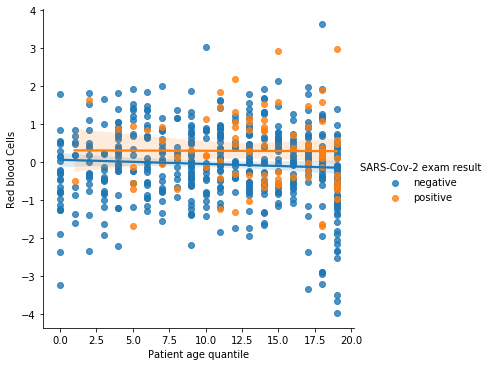

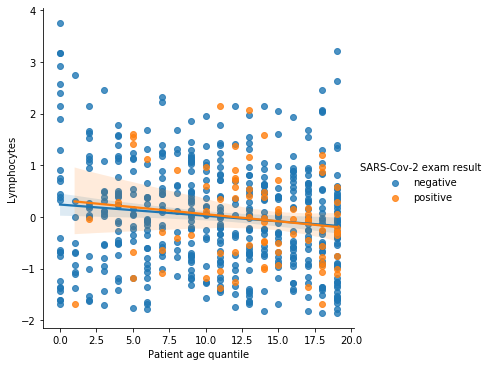

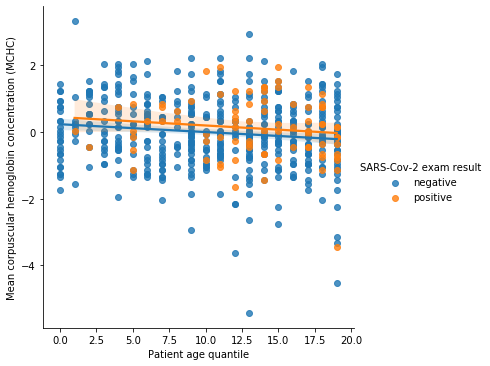

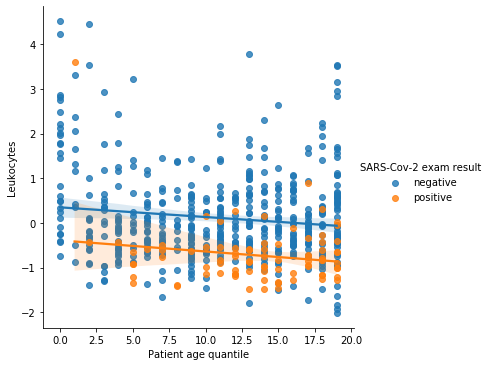

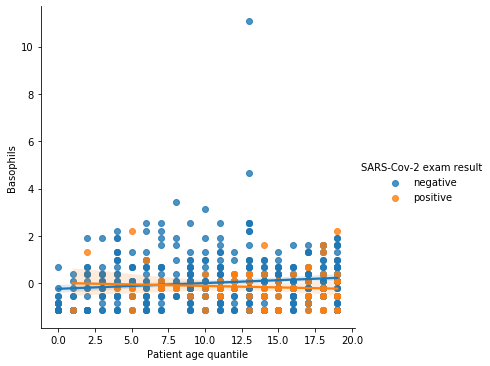

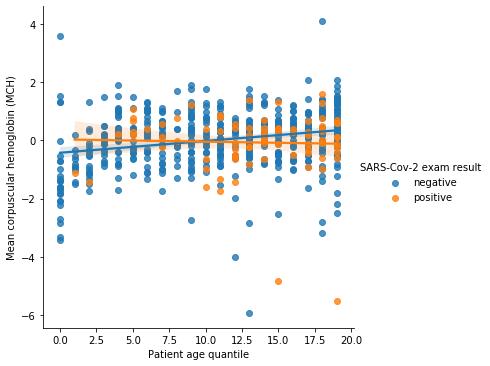

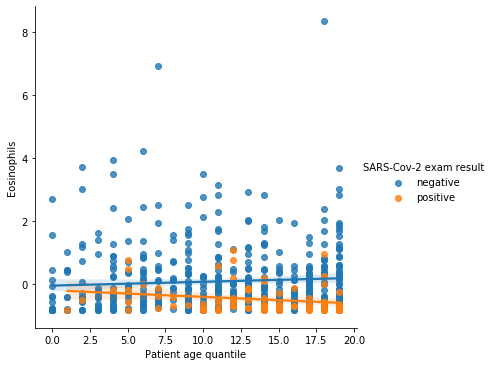

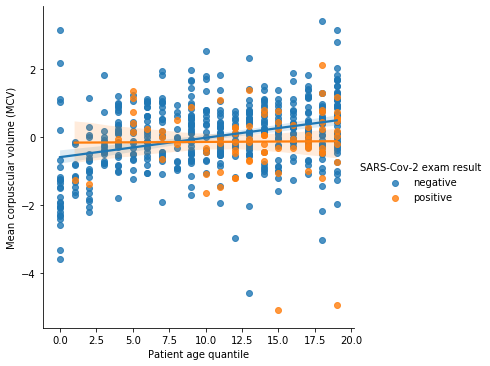

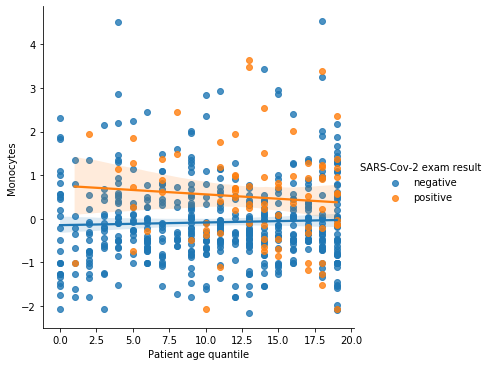

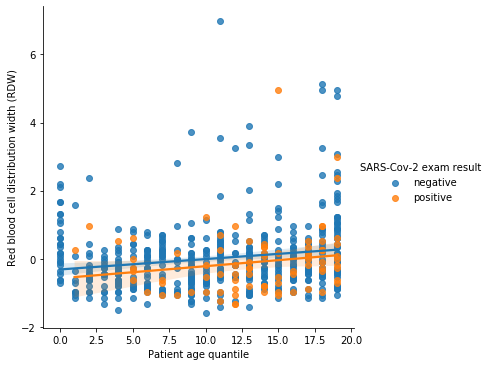

In [365]:
for col in blood:
    plt.figure
    sns.lmplot(x = 'Patient age quantile', y = col, hue = 'SARS-Cov-2 exam result', data=df)

In [366]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [367]:
# faible correlation entre age et blood

# Variable NAN

In [368]:
df[blood].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [369]:
df[viral].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [370]:
df1 = df[viral[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\malic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [371]:
df1 = df[blood[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\malic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

# Pre-processing 

In [431]:
df_1 = data.copy()
df_1.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [488]:
missing  = df_1.isna().sum()/df_1.shape[0]

blood = list(df_1.columns[(missing < 0.9) & (missing > 0.88 )])

viral = list(df_1.columns[(missing < 0.80) & (missing > 0.75 )])

In [489]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [490]:
df_1 = df_1[key_columns + blood + viral]
df_1.head()

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                       0         NaN         NaN   
1                    17                       0    0.236515    -0.02234   
2                     8                       0         NaN         NaN   
3                     5                       0         NaN         NaN   
4                    15                       0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  
0                                      NaN  
1                                -0.625073  
2                                      NaN  
3                                      NaN  
4                                      NaN

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
trainset , testset = train_test_split(df_1, test_size = 0.2, random_state = 0)

In [493]:
trainset

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
543                     18                       0    1.358055    1.356092   
4937                    11                       0         NaN         NaN   
2884                     3                       0         NaN         NaN   
1837                    15                       0         NaN         NaN   
2228                     7                       0         NaN         NaN   
2260                     4                       0         NaN         NaN   
4771                     4                       0         NaN         NaN   
5197                     7                       0         NaN         NaN   
5337                     6                       0         NaN         NaN   
3350                    16                       0         NaN         NaN   
3539                     6                       0         NaN         NaN   
1427                     4                       0         NaN         NaN   
2456                     5                       0         NaN         NaN   
203                      9                       0    1.174947    0.854844   
578                     13                       0         NaN         NaN   
2755                     4                       0         NaN         NaN   
5433                     9                       0         NaN         NaN   
1085                     3                       0         NaN         NaN   
1005                    14                       0         NaN         NaN   
1223                     1                       0         NaN         NaN   
3935                    15                       0         NaN         NaN   
4751                     8                       0         NaN         NaN   
269                      1                       0         NaN         NaN   
3025                     4                       0         NaN         NaN   
817                     16                       0         NaN         NaN   
2917                     6                       0         NaN         NaN   
2966                    19                       0         NaN         NaN   
636                     10                       0         NaN         NaN   
420                     14                       0         NaN         NaN   
3487                     2                       0         NaN         NaN   
245                     11                       0         NaN         NaN   
1761                     5                       0         NaN         NaN   
1669                     1                       0         NaN         NaN   
3389                    14                       0         NaN         NaN   
4168                    11                       0         NaN         NaN   
3736                     4                       0         NaN         NaN   
3634                     6                       0         NaN         NaN   
4695                     5                       0         NaN         NaN   
4635                    13                       0         NaN         NaN   
253                      7                       0         NaN         NaN   
1114                     8                       0         NaN         NaN   
2846                    15                       0         NaN         NaN   
1687                     1                       0         NaN         NaN   
3167                    13                       1         NaN         NaN   
1012                    17                       0         NaN         NaN   
4659                    11                       0         NaN         NaN   
5530                    11                       0         NaN         NaN   
2255                    15                       0         NaN         NaN   
1624                    10                       1    1.037616    1.481403   
624                      6                       0         NaN         NaN   
3172                     7  

In [494]:
trainset['SARS-Cov-2 exam result'].value_counts()

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64

In [495]:
testset['SARS-Cov-2 exam result'].value_counts()

0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64

# Encodage

In [496]:
code  = {
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
}

In [497]:
for col in df_1.select_dtypes('object'):
    df_1[col] = df_1[col].map(code)

In [498]:
df_1.dtypes.value_counts()

float64    14
int64       2
dtype: int64

In [513]:
def encodage(df):
    
    code  = {'positive':1,
             'negative':0,
             'detected':1,
             'not_detected':0}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df

In [520]:
def feature_eng(df):
    df['est malade'] = df[viral].sum(axis=1) >=1
    
    df = df.drop(viral, axis = 1)
    return df

In [521]:
def imputation(df):
    return df.dropna(axis = 0)

In [522]:
#def imputation2(df):
   # return df.fillna(-999)
# donner plus de données afin de lutter contre l'overfitting, mais le score est moins bon donc mauvaise solution

In [523]:
#def fonction(df):
    
    #X = df.drop( 'SARS-Cov-2 exam result',axis = 1)
    #y = df['SARS-Cov-2 exam result']
    
    #print(y.value_counts())
    #return X,y
    

In [524]:
def prepo(df):
    df = encodage(df)
    df = feature_eng(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result',axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    return X,y

In [525]:
 X_train,y_train  = prepo(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\malic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [526]:
X_test, y_test = prepo(testset)

C:\Users\malic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


# Modélisation

In [562]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [571]:
#model = DecisionTreeClassifier(random_state=0)
#model = RandomForestClassifier(random_state=0)

prepocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif ,k = 10))

In [579]:
Random = make_pipeline(prepocessor, RandomForestClassifier(random_state=0))
Ada = make_pipeline(prepocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(prepocessor,StandardScaler() ,SVC(random_state=0))
KN = make_pipeline(prepocessor, StandardScaler(), KNeighborsClassifier())

In [580]:
liste = {'Random':Random, 'Ada':Ada, 'SVM':SVM, 'KN':KN}

Random
[[93  2]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.71      0.31      0.43        16

    accuracy                           0.88       111
   macro avg       0.80      0.65      0.68       111
weighted avg       0.87      0.88      0.86       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f =

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

Ada
[[87  8]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        95
           1       0.47      0.44      0.45        16

    accuracy                           0.85       111
   macro avg       0.69      0.68      0.68       111
weighted avg       0.84      0.85      0.84       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

SVM
[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67       111
weighted avg       0.85      0.87      0.86       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

KN
[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

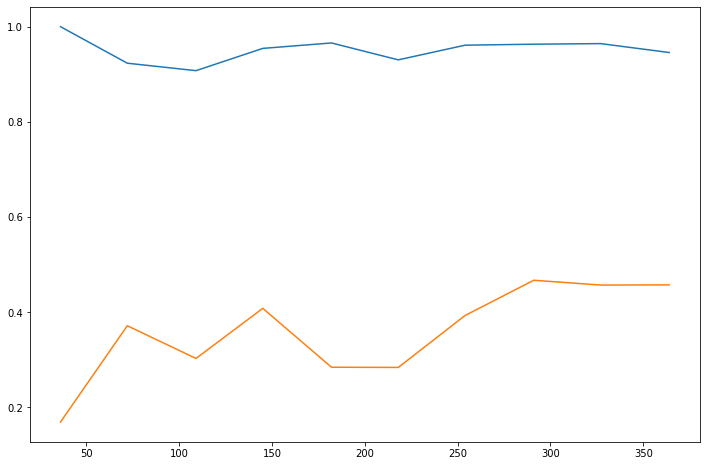

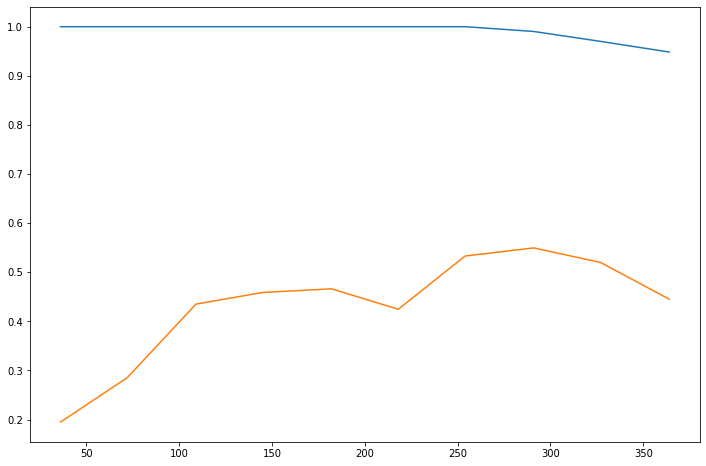

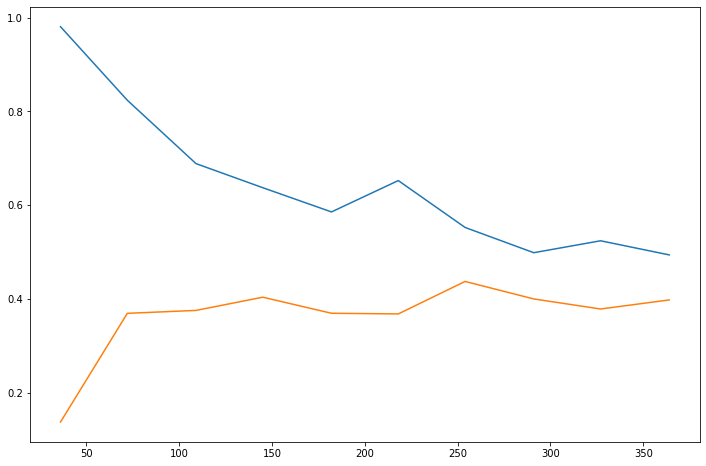

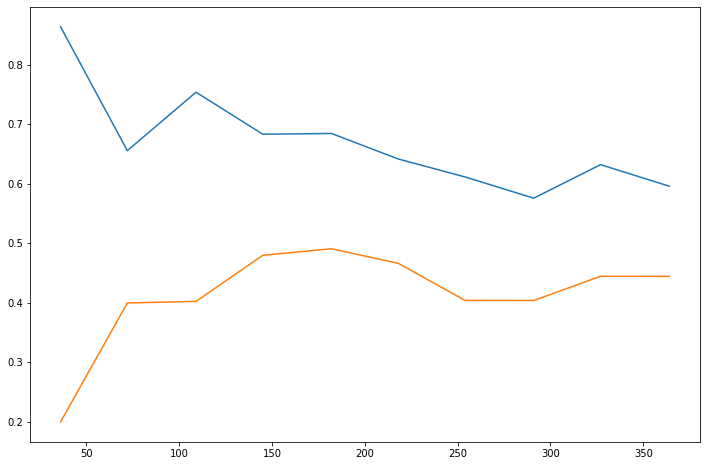

In [581]:
for name,model in liste.items():
    print(name)
    evaluation(model)

# Evaluation 

In [556]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [557]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test )
    
    print(confusion_matrix(y_test,ypred))
    
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model,X_train, y_train, cv=4, scoring='f1',
                                               train_sizes= np.linspace(0.1,1,10)
                                           )
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divi

[[93  2]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.71      0.31      0.43        16

    accuracy                           0.88       111
   macro avg       0.80      0.65      0.68       111
weighted avg       0.87      0.88      0.86       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-package

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0  16  32  47  61  74  86  97 107 116 124 131 137 142 146 149 151 152] are constant.
  Us

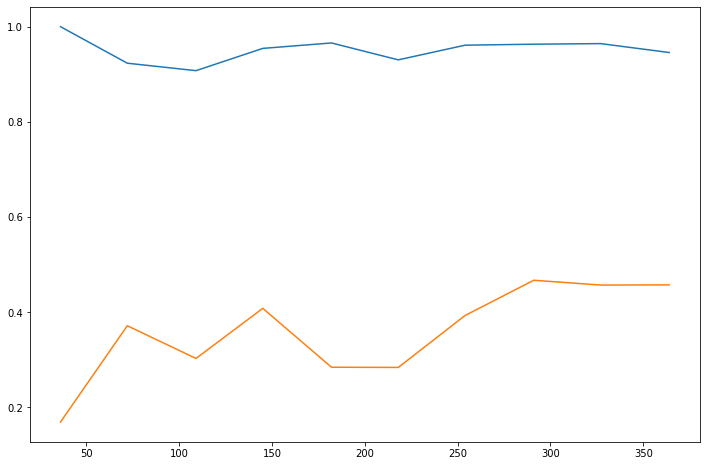

In [558]:
evaluation(model)

# Selection de feature

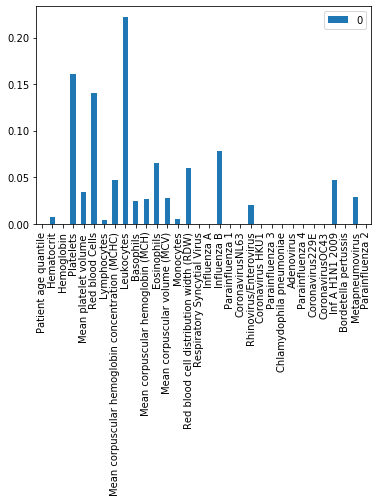

In [462]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar()

# Optimisation d'un modèle

In [589]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [583]:
SVM


Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x00000251A9601950>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rb

In [594]:
hyper_para = {'svc__gamma':[1e-3,1e-4],'svc__C':[1,10,100,1000],
             'pipeline__polynomialfeatures__degree': [2, 3, 4],
                   'pipeline__selectkbest__k':range(4,100)}

In [597]:
grid = RandomizedSearchCV(SVM, hyper_para, scoring='recall', cv = 4, n_iter = 40)
                   

In [598]:
grid.fit(X_train , y_train)

print(grid.best_params_)

y_pred  = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  19

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  74

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 64

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  15   31   46   60   73   85   96  106  115  123  130  136  141  145
  148  150  151  167  182  196  209  221  232  242  251  259  266  272
  277  281  284  286  287  302  316  329  341  352  362  371  379  386
  392  397  401  404  406  407  421  434  446  457  467  476  484  491
  497  502  506  509  511  512  525  537  548  558  567  575  582  588
  593  597  600  602  603  615  626  636  645  653  660  666  671  675
  678  680  681  692  702  711  719  726  732  737  741  744  746  747
  757  766  774  781  787  792  796  799  801  802  811  819  826  832
  837  841  844  846  847  855  862  868  873  877  880  882  883  890
  896  901  905  908  910  911  917  922  926  929  931  932  937  941
  944  946  947  951  954  956  957  960  962  963  965  966  967  983
  998 1012 1025 1037 1048 1058 1067 1075 1082 1088 1093 1097 1100 1102
 1103 1118 1132 1145 1157 11

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873 877 880 882 883 890
 896 901 905 908 910 911 917 922 926 929 931 932 937 941 944 946 947 951
 954 956 957 960 962 963 965 966 967] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature

{'svc__gamma': 0.0001, 'svc__C': 1000, 'pipeline__selectkbest__k': 79, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151 167
 182 196 209 221 232 242 251 259 266 272 277 281 284 286 287 302 316 329
 341 352 362 371 379 386 392 397 401 404 406 407 421 434 446 457 467 476
 484 491 497 502 506 509 511 512 525 537 548 558 567 575 582 588 593 597
 600 602 603 615 626 636 645 653 660 666 671 675 678 680 681 692 702 711
 719 726 732 737 741 744 746 747 757 766 774 781 787 792 796 799 801 802
 811 819 826 832 837 841 844 846 847 855 862 868 873

In [ ]:
#tester pour ADO

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67       111
weighted avg       0.85      0.87      0.86       111



C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklear

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  31  46  60  73  85  96 106 115 123 130 136 141 145 148 150 151] are constant.
  UserWarning)
C

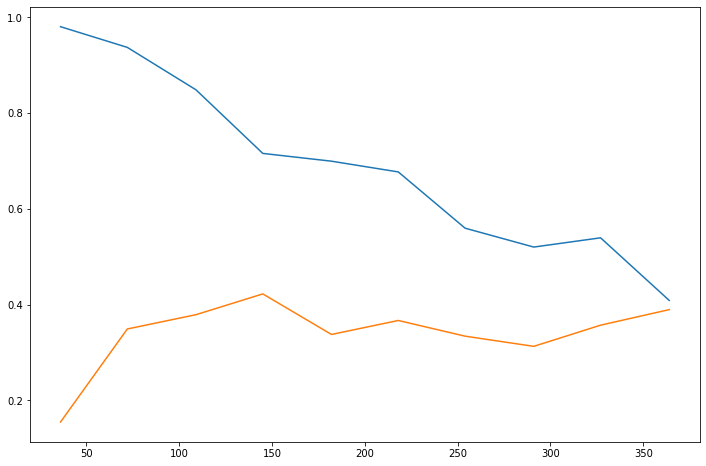

In [588]:
evaluation(grid)

In [599]:
from sklearn.metrics import precision_recall_curve

In [604]:
precision, recall, seuil = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

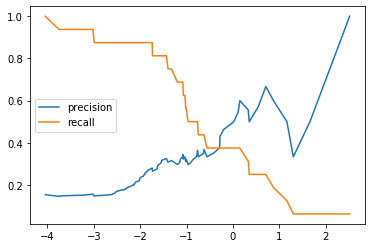

In [606]:
plt.plot(seuil, precision[:-1], label= 'precision')
plt.plot(seuil, recall[:-1], label= 'recall')
plt.legend()

In [609]:
def model_final(model, X, seuil = 0):
    
    
    return model.decision_function(X) > seuil

In [612]:
y_pred = model_final(grid.best_estimator_, X_test, seuil= -1)

In [614]:
from sklearn.metrics import recall_score

In [613]:
f1_score(y_test, y_pred)

0.37209302325581395

In [615]:
recall_score(y_test, y_pred)

0.5